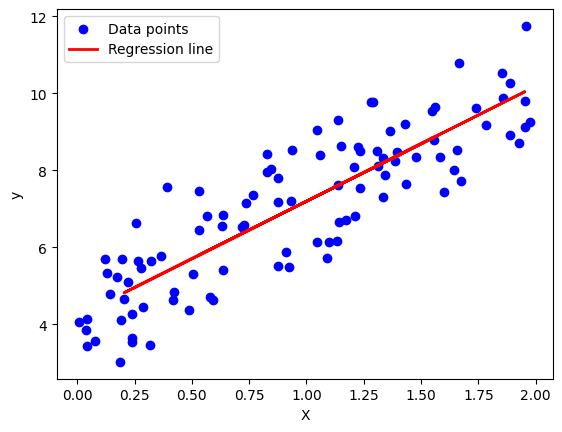

R2: 0.5222440084103068
Intercept: 4.206340188711437
Coefficient: 2.9902591010048902


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 data points in range [0, 2)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_pred, y_test)


# Plot the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print R2
print(f"R2: {r2}")

# Print the model parameters
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficient: {model.coef_[0][0]}")


# Compute the inverse problem (predicting X from y) using matrix operations
# Model parameters
b0 = model.intercept_[0]
b1 = model.coef_[0][0]


We know
$$y_{obs}=x^*\beta+c+epsilon$$

In 1 Dimension, 
$$ y = 
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\vdots  \\
1 & x_n 
\end{bmatrix}
 * \begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}$$

So in 1D, $$ x = \frac{y - \beta_0}{\beta_1} $$

Suppose $y_{obs} = 8$, then $x^*= \frac{8 - 4.2}{2.99} = 1.27$. The true values is 1.33.




In [24]:
print(np.hstack((X_test, y_test, 4+3*X_test, (y_test-b0)/b1)))

[[ 1.38494424  8.24238396  8.15483272  1.34973045]
 [ 0.20408962  4.64409942  4.61226886  0.14639508]
 [ 1.95291893  9.79051518  9.85875679  1.86745523]
 [ 1.34127574  7.87419268  8.02382722  1.22660023]
 [ 1.33353343  7.30603243  8.00060029  1.03659654]
 [ 1.3636406   9.01312847  8.09092179  1.6074822 ]
 [ 0.92295872  5.49839118  6.76887617  0.43208663]
 [ 0.63596636  5.40986663  5.90789908  0.40248233]
 [ 1.58345008  8.34717328  8.75035023  1.38477401]
 [ 1.09762701  6.12773118  7.29288102  0.64255   ]
 [ 1.5563135   8.7958526   8.66894051  1.53482098]
 [ 0.52911122  7.45489263  5.58733367  1.08637825]
 [ 1.20969104  6.80263458  7.62907312  0.86825064]
 [ 1.1368679   9.32066865  7.41060369  1.71032953]
 [ 0.6371379   6.83227254  5.91141371  0.87816215]
 [ 0.8473096   8.03018099  6.5419288   1.27876571]
 [ 0.56561393  6.8234777   5.69684178  0.87522098]
 [ 0.24039312  3.64124786  4.72117937 -0.18897771]
 [ 1.13608912  7.61654234  7.40826737  1.14043701]
 [ 1.54846738  9.55144679  8.64

### Pseudoinverse Formulas



1. **Pseudoinverse of a Tall Matrix (Full Column Rank)**

   For a matrix $A$ of size $(m,n)$ where $m > n$ and $A$ has full column rank, the pseudoinverse is:
   $$A^+ = A^TA^{-1}A^T$$

2. **Pseudoinverse of a Wide Matrix (Full Row Rank)**

   For a matrix $A$ of size $(m,n)$ where $n > n$ and $A$ has full column rank, the pseudoinverse is:
   $$A^+ = A^T(AA^T)^{-1}$$
3. **General Formula for the Pseudoinverse (via Singular Value Decomposition)**

   For any matrix $A$, the pseudoinverse can be computed using the Singular Value Decomposition (SVD). Let the SVD of $A$ be:
   $$A = U \Sigma V^T$$ 
   where $U$ and $V$ are orthogonal matrices, and $\Sigma$ is a diagonal matrix of singular values. Then the pseudoinverse is:
   $$A^+ = V \Sigma^+ U^T$$
   where $\Sigma^+$ is the pseudoinverse of $\Sigma$, formed by taking the reciprocal of each non-zero singular value and transposing the matrix.

### 2D derivation

In 2-dimensions

$$ y = 
\begin{bmatrix}
1 & x_{11} & x_{21} \\
1 & x_{12} & x_{22} \\
1 & x_{13} & x_{23} \\
\vdots  \\
1 & x_{1n} & x_{2n} 
\end{bmatrix}
 * \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{bmatrix}$$

$$y_{obs}-\beta_0 = \begin{bmatrix}
x_{11} & x_{21} \\
x_{12} & x_{22} \\
x_{13} & x_{23} \\
\vdots  \\
x_{1n} & x_{2n} 
\end{bmatrix}
 * \begin{bmatrix}
\beta_1 \\
\beta_2
\end{bmatrix}$$

We know $$y_{obs}=x^*\beta+c+epsilon$$

so, as **$\beta$** is tall we can use the following pseudo-inverse formula 

$$x^*=(y_{obs}-\beta_0)(\beta^T \beta)^{-1} \beta^T$$

The pseudo inverse for $\beta$ is given as 

$$
\beta^+ = \frac{1}{\beta_1^2 + \beta_2^2} \begin{pmatrix} \beta_1 & \beta_2 \end{pmatrix}
$$

This is a $(1 , p)$ matrix. Since $(y_{obs}-\beta_0)$ has shape $(1,n)$ where $n$ is the number of observations then the resulting matrix $(y_{obs}-\beta_0)(\beta^T \beta)^{-1} \beta^T$ has shape $(n,1) * (1,p) = (n,p)$ which is the correct dimensions of $x$.




### Pseudoinverse Derivation

Let the matrix **$\beta$**
$$
\beta = \begin{pmatrix}
\beta_1 \\
\beta_2
\end{pmatrix}
$$

The pseudoinverse **$\beta^+$** is given by:
$$
\beta^+ = (\beta^T\beta)^{-1} \beta^T
$$

#### Step 1: Compute $\beta^T \beta$

The transpose of $\beta$ is:
$$
\beta^T = \begin{pmatrix} \beta_1 & \beta_2 \end{pmatrix}
$$

Now, compute $\beta^T \beta$:
$$
\beta^T \beta = \begin{pmatrix} \beta_1 & \beta_2 \end{pmatrix} \begin{pmatrix} \beta_1 \\ \beta_2 \end{pmatrix} = \beta_1^2 + \beta_2^2
$$

#### Step 2: Compute $(\beta^T \beta)^{-1} $

The inverse of $\beta^T \beta$ is:
$$
(beta^T \beta)^{-1} = \frac{1}{\beta_1^2 + \beta_2^2}
$$

#### Step 3: Compute the Pseudoinverse $\beta^+$

Finally, the pseudoinverse is:
$$
\beta^+ = \frac{1}{\beta_1^2 + \beta_2^2} \begin{pmatrix} \beta_1 & \beta_2 \end{pmatrix}
$$





Thus, the pseudoinverse of $\beta$ is:
$$
\beta^+ = \frac{1}{\beta_1^2 + \beta_2^2} \begin{pmatrix} \beta_1 & \beta_2 \end{pmatrix}
$$